# Support Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from libsvm.svmutil import svm_problem, svm_parameter, svm_train, svm_predict

# $\star$ Question 1:


In this exercise, we will use the package `libsvm-official`.
It should already be installed, since you installed all
packages from the `requirements.txt` file. Installation and usage instructions can be found 
[here](https://github.com/cjlin1/libsvm/tree/master/python).
Details on parameters can be found [here](https://github.com/cjlin1/libsvm).
If you have problems installing it on Windows, make sure you are using python 3.8 (run `python -V`).
Further documentation can be found on the 
[main page](http://www.csie.ntu.edu.tw/~cjlin/libsvm/).

1. Load the data from dataset.npz and, like in previous assignments,
split it evenly into a training set and a test set.
Visualize the data, you can reuse parts of exercise 4 for this.
2. Learn how to select kernels and how to deal with the multiclass case.
Train the SVM with your training points and verify its performance on the test points.
Start with a linear SVM and try an RBF kernel SVM later.
How does the SVM compare to the classification methods in previous
assignments?
3. Visualize the results.
    1. Plot the test predictions and mark wrong predictions with a black circle around them
    (use `plt.scatter(..., marker="o", ec="black", fc="none", s=200)` to get black circles)
    1. Plot the training points and mark the support vectors by plotting them in a bigger size. Use `sv_indices = np.array(model.get_sv_indices()) - 1` to get the support vector indices. Note how svmlib starts counting at 1, so we need to subtract 1.
    1. Create a contour plot as in exercise 4: 
    Create a meshgrid for the 2 input features, reshape and stack it,
    predict it's labels using the trained SVM model and plot the contour.
4. Play around with the hyperparameters. 
    Can you tune the hyperparameters to get even better results?

Hints: libsvm expects the model parameters as a single string, e.g. `"-t 2"` for the RBF kernel and `"-t 0"` for the linear kernel. Use `-q` for quiet mode.


(140, 3) (140, 3)


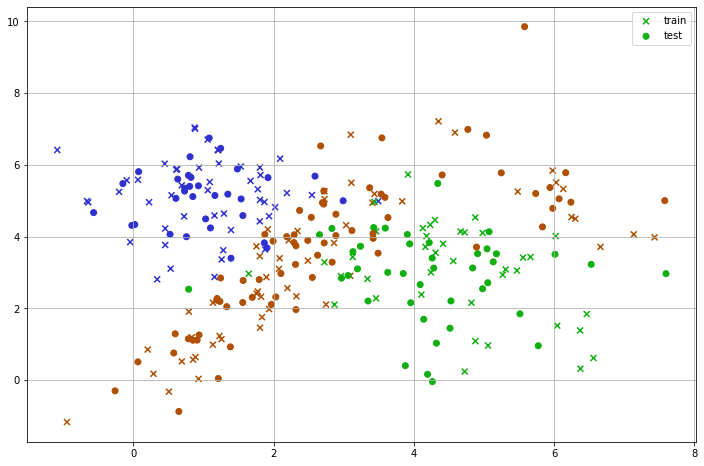

In [2]:
data = np.load('../data/dataset.npz')["arr_0"]

# setting random_state allows us to get the same "random" split everytime we split the data
data_train, data_test = train_test_split(data, test_size=0.5, random_state=42)
print(data_train.shape, data_test.shape)

# create color maps
cmap_light = ListedColormap(['#ff9f2f', '#5fff5f', '#7f7fff'])
cmap_bold = ListedColormap(['#af4f00', '#0faf0f', '#2f2fcf'])

# scatterplot data
plt.figure(figsize=(12,8))

def scatter_data(data, **kwargs):
    plt.scatter(
        data[: ,0], data[: ,1], c=data[: ,2],
        cmap=cmap_bold, **kwargs)
    
scatter_data(data_train, marker="x", label="train")
scatter_data(data_test, marker="o", label="test")
plt.grid()
plt.legend()
plt.show()


In [3]:
def libsvm_classifier(data_train, data_test, params):
    """
    takes the training and test data and a specified kernel and uses a svm model
    to return the predicted labels of the test data as well as the accuracy.
    LibSVM automatically generates a multi-class classifier if the input has more than two classes.
    """
    print(f"Running SVM with parameters {params}")
    x_train = data_train[:, :2]
    y_train = data_train[:, 2]
    x_test = data_test[:, :2]
    y_test = data_test[:, 2]

    # set the inital training data
    prob = svm_problem(y_train, x_train)
    
    # set the parameters of the model, additional parameters can be changed from 
    # their defaults here if you wish, check the documentation for details
    param = svm_parameter(params)
    
    # train the model
    model = svm_train(prob, param)
    
    # predict the test data
    p_label, p_acc, p_val = svm_predict(y_test, x_test, model)
    acc, mse, scc = p_acc
    
    # create meshgrid
    border = 1
    x1_min, x1_max = x_test[:, 0].min() - border, x_test[:, 1].max() + border
    x2_min, x2_max = x_test[:, 0].min() - border, x_test[:, 1].max() + border
    grid_size = .02
    x1range = np.arange(x1_min, x1_max, grid_size)  # (width)
    x2range = np.arange(x2_min, x2_max, grid_size)  # (height)
    xx1, xx2 = np.meshgrid(x1range, x2range)  # both (height, width)
    grid_inputs = np.stack([xx1.reshape(-1), xx2.reshape(-1)], axis=-1)    
    
    # predict labels for the meshgrid
    grid_pred, _, _ = svm_predict([], grid_inputs, model)
    grid_pred = np.array(grid_pred)
    grid_pred = grid_pred.reshape(xx1.shape)
    
    # setup plot
    plt.figure(figsize=(12, 8))
    
    # plot the meshgrid
    plt.contourf(xx1, xx2, grid_pred, cmap=cmap_light)
    
    # plot all train points
    scatter_data(data_train, marker="x", label="train")
    
    # plot support vectors in bigger size
    sv_indices = np.array(model.get_sv_indices()) - 1
    scatter_data(data_train[sv_indices], marker="x", label="train SVs", s=200)
    
    # plot test points
    scatter_data(data_test, marker="o", label="test")
    
    # explicitly mark wrong predictions
    wrong_pred = p_label != y_test
    data_test_wrong = data_test[wrong_pred]
    plt.scatter(data_test_wrong[:, 0], data_test_wrong[:, 1],
                marker="o", label="errors", ec="black", fc="none", s=200)
    
    plt.grid()
    plt.legend()
    plt.show()


---------- RBF kernel
Running SVM with parameters -q -t 2
Accuracy = 89.2857% (125/140) (classification)
Accuracy = 0% (0/385641) (classification)


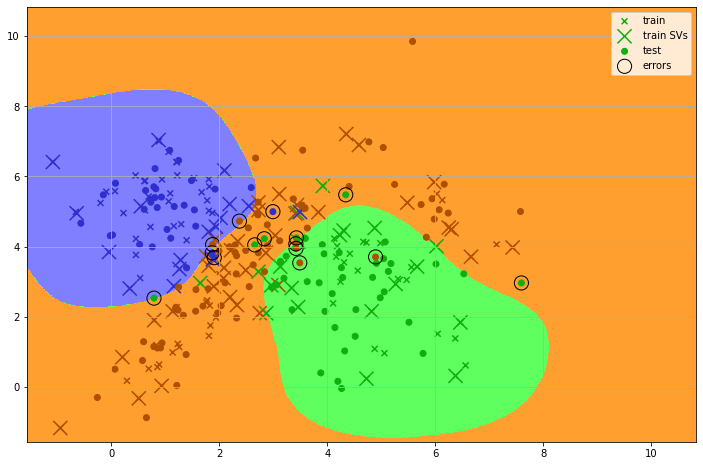

---------- Linear kernel
Running SVM with parameters -q -t 0
Accuracy = 78.5714% (110/140) (classification)
Accuracy = 0% (0/385641) (classification)


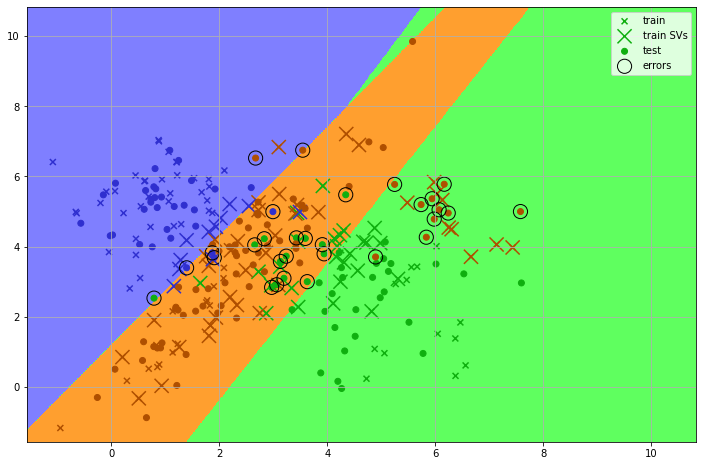

In [4]:
# Train, predict, plot
print(f"---------- RBF kernel")
libsvm_classifier(data_train, data_test, "-q -t 2")
print(f"---------- Linear kernel")
libsvm_classifier(data_train, data_test, "-q -t 0")

---------- Polynomial kernel, default degree 3
Running SVM with parameters -q -t 1
Accuracy = 72.1429% (101/140) (classification)
Accuracy = 0% (0/385641) (classification)


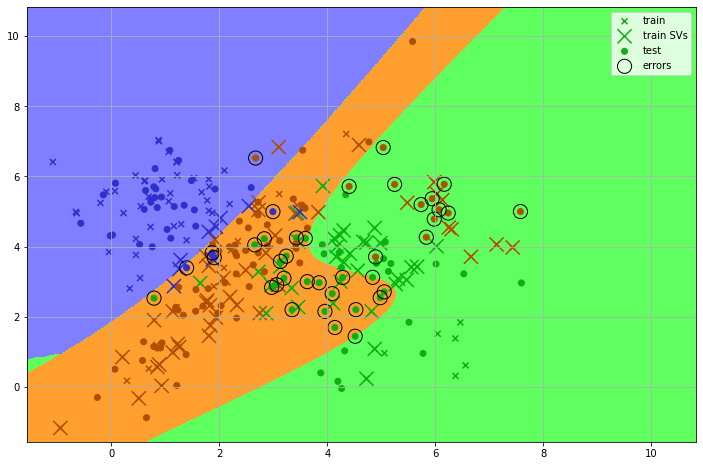

---------- Sigmoid kernel
Running SVM with parameters -q -t 3
Accuracy = 35% (49/140) (classification)
Accuracy = 0% (0/385641) (classification)


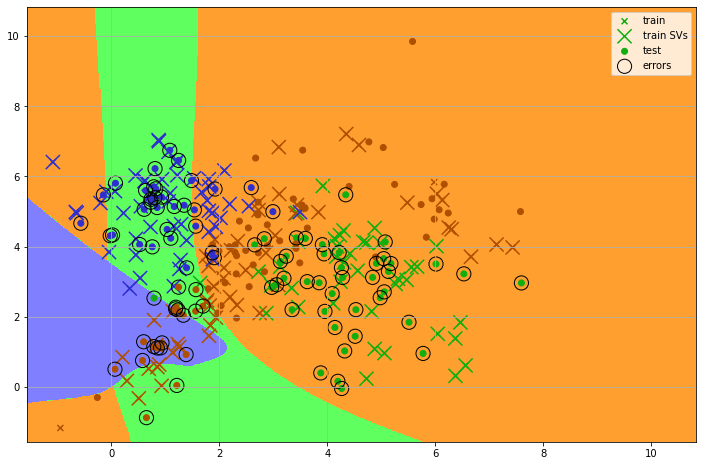

In [5]:
# try different kernels
print(f"---------- Polynomial kernel, default degree 3")
libsvm_classifier(data_train, data_test, "-q -t 1")

print(f"---------- Sigmoid kernel")
libsvm_classifier(data_train, data_test, "-q -t 3")

The RBF kernel performed best so far. Now, we change its hyperparameter gamma, which scales the inverse variance of the gaussian kernel. High gamma means low variance and low size of the kernel, so most training datapoints will be fit correctly but generalization suffers.


---------- RBF kernel with different gammas (hyperparameter for the RBF kernel)
Running SVM with parameters -q -t 2 -g 0.01
Accuracy = 76.4286% (107/140) (classification)
Accuracy = 0% (0/385641) (classification)


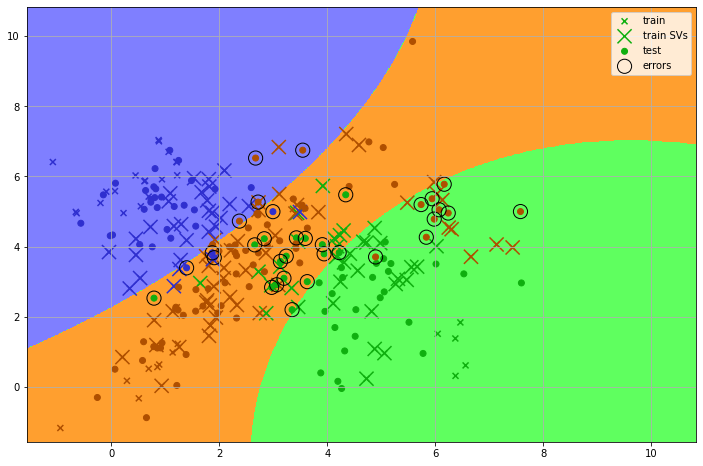

Running SVM with parameters -q -t 2 -g 0.1
Accuracy = 88.5714% (124/140) (classification)
Accuracy = 0% (0/385641) (classification)


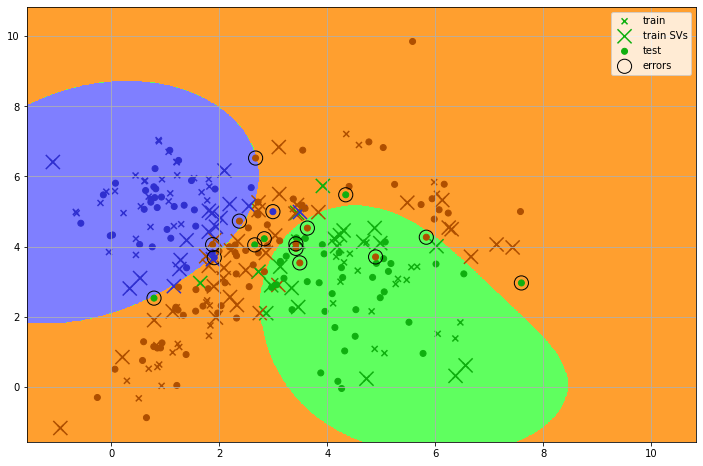

Running SVM with parameters -q -t 2 -g 0.5
Accuracy = 89.2857% (125/140) (classification)
Accuracy = 0% (0/385641) (classification)


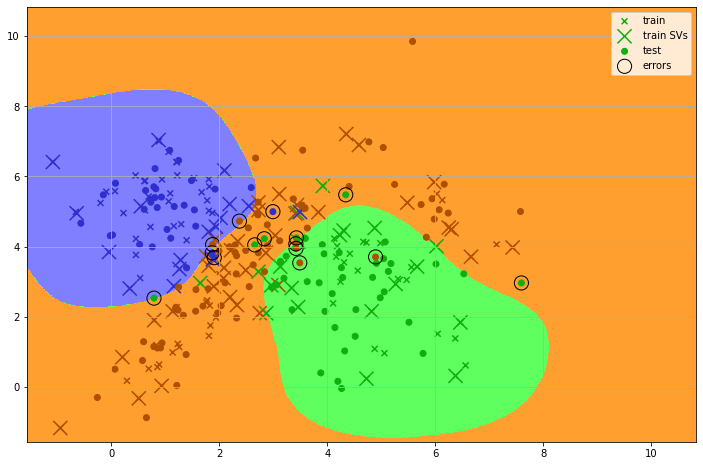

Running SVM with parameters -q -t 2 -g 2.0
Accuracy = 86.4286% (121/140) (classification)
Accuracy = 0% (0/385641) (classification)


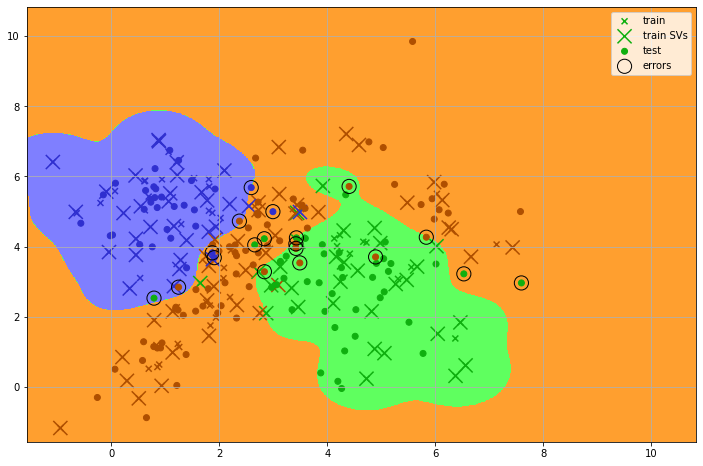

Running SVM with parameters -q -t 2 -g 10.0
Accuracy = 80% (112/140) (classification)
Accuracy = 0% (0/385641) (classification)


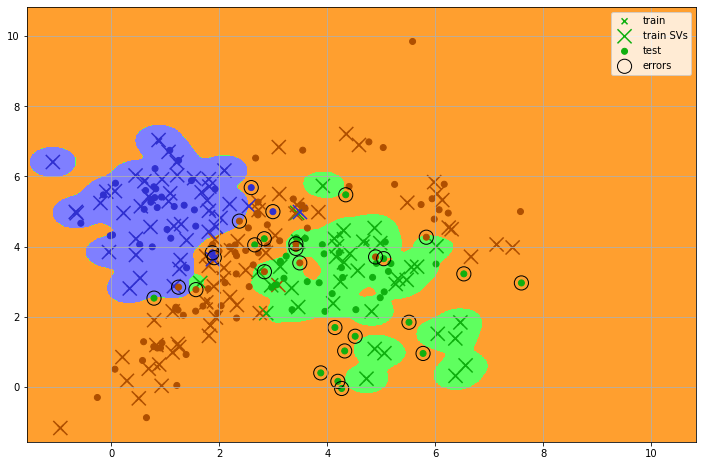

In [6]:
print(f"---------- RBF kernel with different gammas (hyperparameter for the RBF kernel)")
for g in [0.01, 0.1, 0.5, 2.0, 10.0]:
    libsvm_classifier(data_train, data_test, f"-q -t 2 -g {g}")

Hyperparameter C the determines trade-off between having a high margin (low C), which may generalize better, and correctly classifying all training points (high C), which avoids errors but may not generalize as well.

Running SVM with parameters -q -t 2 -c 0.05
Accuracy = 66.4286% (93/140) (classification)
Accuracy = 0% (0/385641) (classification)


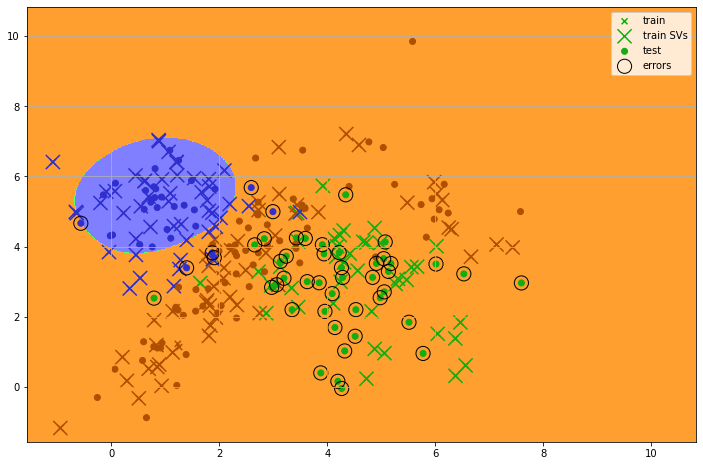

Running SVM with parameters -q -t 2 -c 0.1
Accuracy = 83.5714% (117/140) (classification)
Accuracy = 0% (0/385641) (classification)


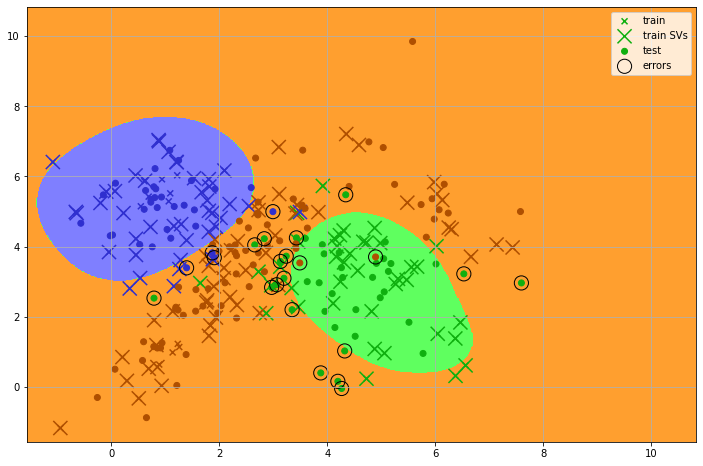

Running SVM with parameters -q -t 2 -c 1
Accuracy = 89.2857% (125/140) (classification)
Accuracy = 0% (0/385641) (classification)


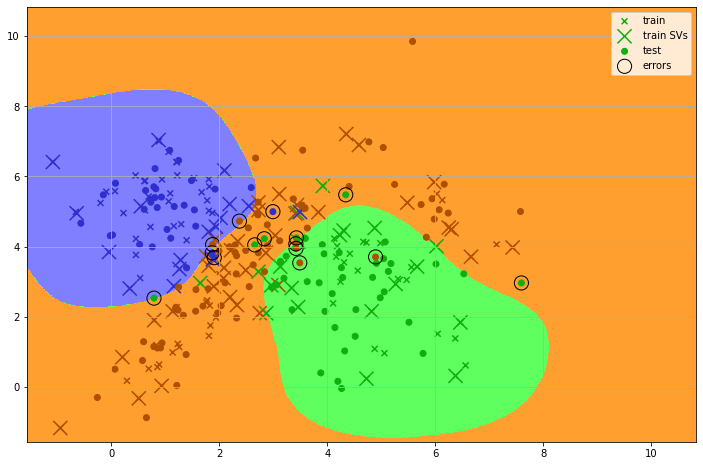

Running SVM with parameters -q -t 2 -c 10
Accuracy = 87.1429% (122/140) (classification)
Accuracy = 0% (0/385641) (classification)


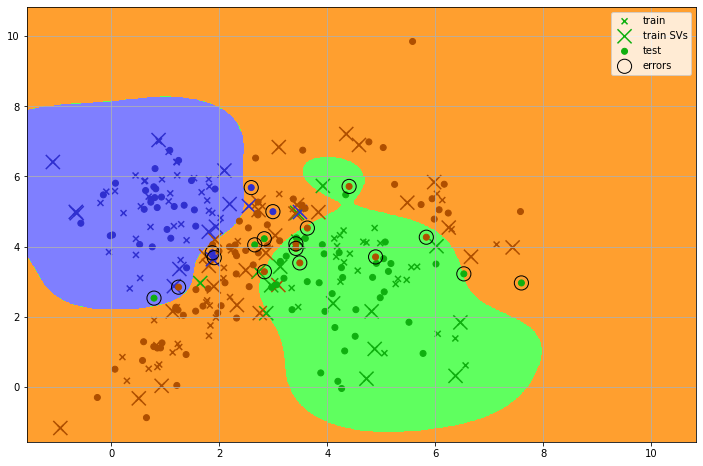

Running SVM with parameters -q -t 2 -c 100
Accuracy = 85% (119/140) (classification)
Accuracy = 0% (0/385641) (classification)


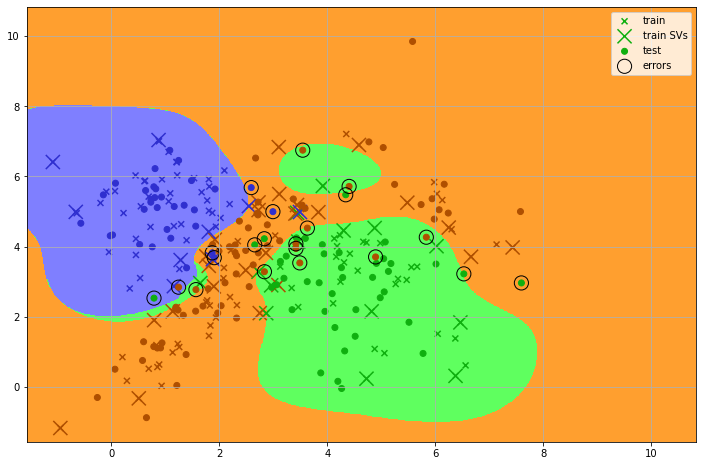

In [7]:
for r in [0.05, 0.1, 1, 10, 100]:
    libsvm_classifier(data_train, data_test, f"-q -t 2 -c {r}")